In [100]:
# 아래와 같이 필요한 라이브러리를 임포트 합니다.
import numpy as np
import scipy as sp
import pandas as pd
from pandas import Series, DataFrame
import scipy.stats as stats
# 시각화 라이브러리
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

# 한글 폰트 설정 (맑은고딕)
plt.rc('font', family='Malgun Gothic') # For Windows

# 소수점 3자리 숫자까지 표시
%precision 3

'%.3f'

In [2]:
data = pd.read_excel('국민건강영양조사2018.xlsx')

data.head(15)

,mod_d,ID,ID_fam,year,region,town_t,apt_t,psu,sex,age,...,HEI_TVEG,HEI_VEG,HEI_PROTF,HEI_DAIRY,HEI_SFA,HEI_NA,HEI_SWEET,HEI_CHO,HEI_FAT,HEI_EN
0,2020.09.01.,A901020501,A9010205,2018,1,1,2,A901,1,80,...,1.36716,0.775022,5.8,0,5.27348,10,10,5,5,0
1,2020.09.01.,A901021301,A9010213,2018,1,1,2,A901,1,78,...,4.88104,1.64181,10,10,10,3.4188,10,4.34525,2.95657,5
2,2020.09.01.,A901021302,A9010213,2018,1,1,2,A901,2,75,...,3.36765,4.94363,4.84972,10,0,9.80616,10,5,5,5
3,2020.09.01.,A901022601,A9010226,2018,1,1,2,A901,2,43,...,,,,,,,,,,
4,2020.09.01.,A901023303,A9010233,2018,1,1,2,A901,2,80,...,4.6194,0.437024,1.95156,0,10,8.02951,10,0,0,1.24413
5,2020.09.01.,A901023304,A9010233,2018,1,1,2,A901,2,71,...,2.45956,3.50312,2.13588,10,0,10,10,3.47727,5,5
6,2020.09.01.,A901023501,A9010235,2018,1,1,2,A901,1,44,...,2.36897,1.64036,5.37917,0,10,10,10,0,0,0
7,2020.09.01.,A901023502,A9010235,2018,1,1,2,A901,2,42,...,1.07001,0.762023,3.35412,0,10,10,10,0,0,0
8,2020.09.01.,A901023503,A9010235,2018,1,1,2,A901,2,13,...,,,,,,,,,,
9,2020.09.01.,A901023504,A9010235,2018,1,1,2,A901,1,11,...,,,,,,,,,,


# 결혼 한 사람과 안 한 사람의 건강상태는 차이가 있을까?

## 목차
### 1.결혼 한 사람 안 한 사람 건강 상태 비교
### 2.미혼과 기혼의 건강 상태 비교
### 3.결혼 한 사람과 안 한 사람의 골관절염 비교
### 4.전업 주부와 전업 주부 아닌 사람의 골 관절염 비율 비교
## 추가)
### 5.전업 주부와 전업 주부 아닌 사람의 골 관절염에대한 카이제곱 검정
### 6.결혼, 성별에 따른 건강 상태

## 결혼 한 사람 안 한 사람 건강 상태 비교

In [3]:
data2= data[data['age']>=30]
data2["결혼상태"]= ["동거" if s==1 else ("별거" if s==2 else ("사별" if s==3 else("이혼"if s==4 else "미혼") ))for s in data2['marri_2']]
data3 = data2[(data2.marri_2!=9) | (data2.marri_2!=8) | (data2.marri_2 !=88)| (data2.marri_2 !=99)]
data3["당뇨상태"] = [1 if s==1 else 0 for s in data3['DE1_dg'] ]
data3["고혈압상태"] = [1 if s==1 else 0 for s in data3['HE_HPdg'] ]
data3["심근경색상태"] = [1 if s==1 else 0 for s in data3['DI5_dg'] ]
data3["우울증상태"] = [1 if s==1 else 0 for s in data3['DF2_dg'] ]
data3["뇌졸중상태"] = [1 if s==1 else 0 for s in data3['DI3_dg'] ]

<ipython-input-3-8ed250a55f82>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2["결혼상태"]= ["동거" if s==1 else ("별거" if s==2 else ("사별" if s==3 else("이혼"if s==4 else "미혼") ))for s in data2['marri_2']]


기혼=(별거 + 동거 + 이혼 + 사별)

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

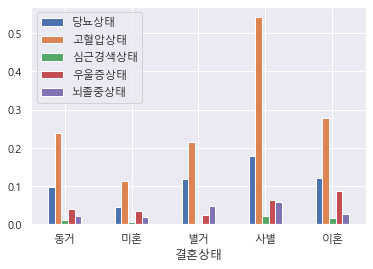

In [4]:
df=data3.groupby('결혼상태')[['당뇨상태','고혈압상태','심근경색상태','우울증상태','뇌졸중상태']].mean()
df.plot(kind='bar')
plt.xticks(rotation=0)

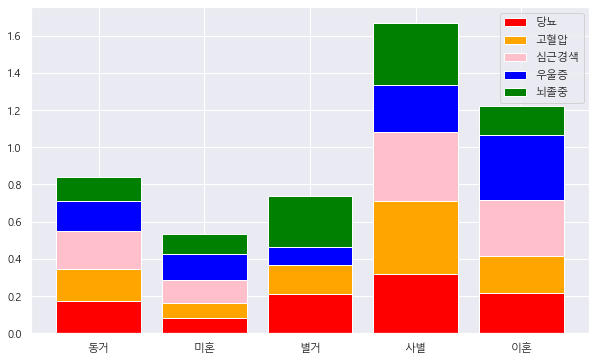

In [5]:

a =data3.groupby('결혼상태').sum()[['당뇨상태']]/data3.groupby('결혼상태').count()[['당뇨상태']]
b=a.to_numpy().reshape(-1,).reshape(5)
c=b/np.sum(b)

d =data3.groupby('결혼상태').sum()[['고혈압상태']]/data3.groupby('결혼상태').count()[['고혈압상태']]
e=d.to_numpy().reshape(-1,).reshape(5)
f=e/np.sum(e)

g =data3.groupby('결혼상태').sum()[['심근경색상태']]/data3.groupby('결혼상태').count()[['심근경색상태']]
h=g.to_numpy().reshape(-1,).reshape(5)
i=h/np.sum(h)

j =data3.groupby('결혼상태').sum()[['우울증상태']]/data3.groupby('결혼상태').count()[['우울증상태']]
k=j.to_numpy().reshape(-1,).reshape(5)
l=k/np.sum(k)

m =data3.groupby('결혼상태').sum()[['뇌졸중상태']]/data3.groupby('결혼상태').count()[['뇌졸중상태']]
n=m.to_numpy().reshape(-1,).reshape(5)
o=n/np.sum(n)

x = np.array([ '동거', '미혼', '별거', '사별','이혼']) 

plt.figure(figsize = (10, 6))

p1 = plt.bar(x, c, color = 'red')
p2 = plt.bar(x, f, bottom = c, color='orange')
p3 = plt.bar(x, i, bottom = f+c, color='pink')
p4 = plt.bar(x, l, bottom = i+f+c, color='blue')
p5 = plt.bar(x, o, bottom = i+f+c+l, color='green')

plt.legend((p1[0], p2[0],p3[0],p4[0],p5[0]), ('당뇨', '고혈압','심근경색','우울증','뇌졸중'))

미혼, 별거, 동거, 이혼, 사별 순으로 건강하다.

## 미혼과 기혼의 건강 상태 비교

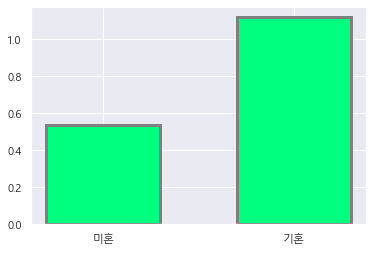

In [6]:
t=i+f+c+l+o
u=t[[0,2,3,4]].sum()/4
s=t[1]

z = np.arange(2)
state = ['미혼', '기혼']
values = [s,u ]

plt.bar(z, values, width=0.6, color="springgreen",edgecolor="gray", linewidth=3, tick_label=state)
plt.show()

미혼인 사람이 기혼인 사람보다 건강하다.

## 결혼 한 사람과 안 한 사람의 골관절염 비교

In [52]:
data4=data3[data3['sex']==2]
# data4['DM2_dg']
data4["골관절염 여부"] = [1 if s==1 else 0 for s in data4['DM2_dg'] ]

<ipython-input-52-7f4f021cdcec>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data4["골관절염 여부"] = [1 if s==1 else 0 for s in data4['DM2_dg'] ]


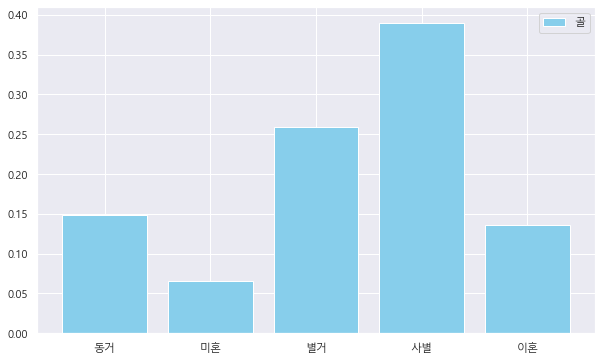

In [53]:
p =data4.groupby('결혼상태').sum()[['골관절염 여부']]/data4.groupby('결혼상태').count()[['골관절염 여부']]
q=p.to_numpy().reshape(-1,).reshape(5)
r= q/np.sum(q)

x = np.array([ '동거', '미혼', '별거', '사별','이혼']) 

plt.figure(figsize = (10, 6))

p1 = plt.bar(x, r, color = 'skyblue')

plt.legend('골관절염 여부')

미혼, 이혼, 동거, 별거, 사별 순으로 관절이 건강하다. 

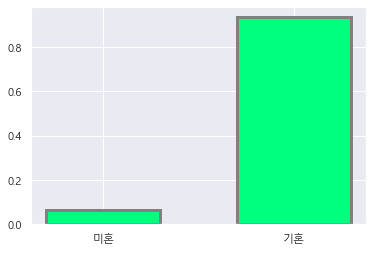

In [54]:
r
w=r[[0,2,3,4]].sum()
v =r[1]

z = np.arange(2)
state = ['미혼', '기혼']
values = [v,w ]

plt.bar(z, values, width=0.6, color="springgreen",edgecolor="gray", linewidth=3, tick_label=state)
plt.show()

미혼인 사람이 기혼인 사람보다 관절이 더 건강하다.

## 전업 주부와 전업 주부 아닌 사람의 골 관절염 비율 비교

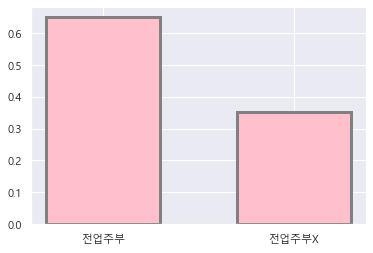

In [80]:
df5=data4[data4['EC1_1']==2]
df6=data4[data4['EC1_1']==1]
df55=df5[df5['marri_1']==1]['골관절염 여부']   
df66=df6[df6['marri_1']==1]['골관절염 여부']
df7=df55.to_numpy().reshape(-1,).reshape(len(df55))/len(df55)
df8=df66.to_numpy().reshape(-1,).reshape(len(df66))/len(df66)

z = np.arange(2)
state = ['전업주부', '전업주부X']
values = [df7.sum()/(df7.sum()+df8.sum()),df8.sum()/(df7.sum()+df8.sum())]

plt.bar(z, values, width=0.6, color="pink",edgecolor="gray", linewidth=3, tick_label=state)
plt.show()

전업주부가 골 관절염이 더 잘걸린다.

## 요약
결혼 한 사람과 안 한 사람의 건강 비교 결과 결혼 안 한 사람이 더 건강한 것으로 나타났다.
결혼 한 사람들 중에는 별거, 동거, 이혼, 사별 순으로 건강하다.

여자들 중에서 결혼 한 사람과 안 한사람의 골관절염 여부를 알아보았는데, 
결혼 안한사람이 결혼 한 사람보다 골관절염 걸린 사람의 비율이 낮다.
결혼 한 사람들 중에는 이혼, 동거, 별거, 사별 순으로 비율이 낮다.

결혼한 여자들 중에서 직장인과 전업주부의 골관절염 비율은 전업주부가 더 높다.

추가) 전업주부와 전업주부X 사이의 관계에서 p값이 0.05보다 작으므로 유의하다.
      
      남자와 여자 중에서 미혼, 별거, 사별, 이혼은 남자가 더 건강하다.
      남자와 여자 중에서 동거는 여자가 더 건강하다.
      

# 수업, 피드백 이후 

## 전업 주부와 전업 주부 아닌 사람의 골 관절염에대한 카이제곱 검정

In [97]:
data4["골관절염여부2"] = ["걸림" if s==1 else "안걸림" for s in data4['DM2_dg'] ]
data4["직업"] = ["전업주부X" if s==1 else "전업주부" for s in data4['EC1_1'] ]
#어차피 결혼 한 사람만 다시 뽑아서 crosstab할거기 때문에 "걸림","전업주부X" 가 아니면 모조리 반대편에 갈도록 두었음.

<ipython-input-97-8514ba322b3c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data4["골관절염여부2"] = ["걸림" if s==1 else "안걸림" for s in data4['DM2_dg'] ]
<ipython-input-97-8514ba322b3c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data4["직업"] = ["전업주부X" if s==1 else "전업주부" for s in data4['EC1_1'] ]


In [98]:
pd.crosstab(data4[data4['marri_1']==1].직업,data4[data4['marri_1']==1].골관절염여부2)

골관절염여부2,걸림,안걸림
직업,,
전업주부,365,1201
전업주부X,212,1248


In [101]:
stats.chi2_contingency(pd.crosstab(data4[data4['marri_1']==1].직업,data4[data4['marri_1']==1].골관절염여부2))

(37.23816222027737,
 1.045476997909154e-09,
 1,
 array([[ 298.606, 1267.394],
        [ 278.394, 1181.606]]))

p값이 0.05보다 작으므로 유의하다.

## 결혼, 성별에 따른 건강 상태

In [115]:
data33= data3[data3['sex']==1]
data333= data3[data3['sex']==2]

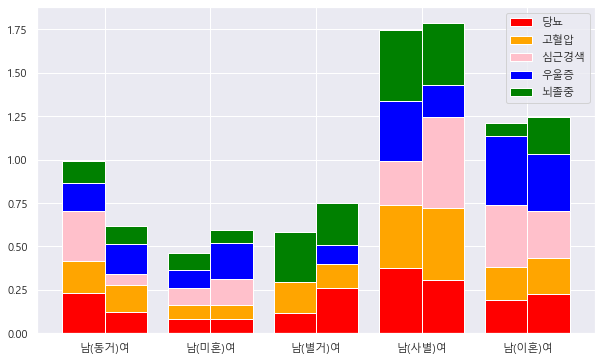

In [122]:
aa =data33.groupby('결혼상태').sum()[['당뇨상태']]/data33.groupby('결혼상태').count()[['당뇨상태']]
bb=aa.to_numpy().reshape(-1,).reshape(5)
cc=bb/np.sum(bb)

dd =data33.groupby('결혼상태').sum()[['고혈압상태']]/data33.groupby('결혼상태').count()[['고혈압상태']]
ee=dd.to_numpy().reshape(-1,).reshape(5)
ff=ee/np.sum(ee)

gg =data33.groupby('결혼상태').sum()[['심근경색상태']]/data33.groupby('결혼상태').count()[['심근경색상태']]
hh=gg.to_numpy().reshape(-1,).reshape(5)
ii=hh/np.sum(hh)

jj =data33.groupby('결혼상태').sum()[['우울증상태']]/data33.groupby('결혼상태').count()[['우울증상태']]
kk=jj.to_numpy().reshape(-1,).reshape(5)
ll=kk/np.sum(kk)

mm =data33.groupby('결혼상태').sum()[['뇌졸중상태']]/data33.groupby('결혼상태').count()[['뇌졸중상태']]
nn=mm.to_numpy().reshape(-1,).reshape(5)
oo=nn/np.sum(nn)

aaa =data333.groupby('결혼상태').sum()[['당뇨상태']]/data333.groupby('결혼상태').count()[['당뇨상태']]
bbb=aaa.to_numpy().reshape(-1,).reshape(5)
ccc=bbb/np.sum(bbb)

ddd =data333.groupby('결혼상태').sum()[['고혈압상태']]/data333.groupby('결혼상태').count()[['고혈압상태']]
eee=ddd.to_numpy().reshape(-1,).reshape(5)
fff=eee/np.sum(eee)

ggg =data333.groupby('결혼상태').sum()[['심근경색상태']]/data333.groupby('결혼상태').count()[['심근경색상태']]
hhh=ggg.to_numpy().reshape(-1,).reshape(5)
iii=hhh/np.sum(hhh)

jjj =data333.groupby('결혼상태').sum()[['우울증상태']]/data333.groupby('결혼상태').count()[['우울증상태']]
kkk=jjj.to_numpy().reshape(-1,).reshape(5)
lll=kkk/np.sum(kkk)

mmm =data333.groupby('결혼상태').sum()[['뇌졸중상태']]/data333.groupby('결혼상태').count()[['뇌졸중상태']]
nnn=mmm.to_numpy().reshape(-1,).reshape(5)
ooo=nnn/np.sum(nnn)

xx = np.array([ '동거', '미혼', '별거', '사별','이혼']) 

plt.figure(figsize = (10, 6))

w = 0.4
x = np.arange(len(cc))
# plt.bar(x, cc, color = 'blue', width = w, align = 'center')
# plt.bar(x + w, y2, color='green', width = w, align = 'center')



p1 = plt.bar(x, cc, width = w,color = 'red')
p2 = plt.bar(x, ff, bottom = cc, width = w,color='orange')
p3 = plt.bar(x, ii, bottom = ff+cc, width = w,color='pink')
p4 = plt.bar(x, ll, bottom = ii+ff+cc, width = w,color='blue')
p5 = plt.bar(x, oo, bottom = ii+ff+cc+ll, width = w,color='green')
p11 = plt.bar(x + w, ccc, width = w, align = 'center', color = 'red')
p22 = plt.bar(x + w, fff, width = w, align = 'center', bottom = ccc, color='orange')
p33 = plt.bar(x + w, iii, width = w, align = 'center', bottom = fff+ccc, color='pink')
p44 = plt.bar(x + w, lll, width = w, align = 'center', bottom = iii+fff+ccc, color='blue')
p55 = plt.bar(x + w, ooo, width = w, align = 'center', bottom = iii+fff+ccc+lll, color='green')
plt.xticks(x+w/2 ,[ '남(동거)여', '남(미혼)여', '남(별거)여', '남(사별)여','남(이혼)여'])

plt.legend((p1[0], p2[0],p3[0],p4[0],p5[0]), ('당뇨', '고혈압','심근경색','우울증','뇌졸중'))


미혼, 별거, 사별, 이혼은 남자가 더 건강하다.

동거는 여자가 더 건강하다.